# Sentiment Analysis of Airline Twitter data

I develop an algorithm to classify tweet sentiment using a Naive Bayes approach. The goal is for the algorithm to classify accurately whether the sentiment of tweets sent by U.S. airline travelers is positive or negative in tone. A positive tweet, for example, would be something like "That was the best flight ever! I love United Airlines", while a negative tweet would be "That flight was awful, and we were delayed for five hours".

# Importing library

In [22]:
import pandas as pd
import numpy as np
import string
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
from wordcloud import WordCloud,STOPWORDS
from stop_words import get_stop_words
import matplotlib.pyplot as plt
from collections import Counter


[nltk_data] Downloading package stopwords to C:\Users\Negar-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read Data

In [10]:
tweets = pd.read_csv(r"C:\Users\Negar-PC\Desktop\Tweets.csv" , header=0)

In [13]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Data Analysis

In [16]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


# Calculate the nulls or NA values in each column

In [17]:
print("Shape of the dataframe is",tweets.shape)
print("The number of nulls in each column are \n", tweets.isna().sum())

Shape of the dataframe is (14640, 15)
The number of nulls in each column are 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [18]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [19]:
tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

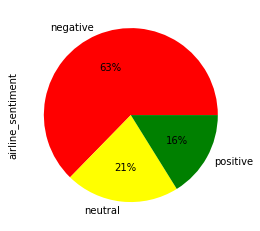

In [26]:
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

# Airline sentiments for each airline

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


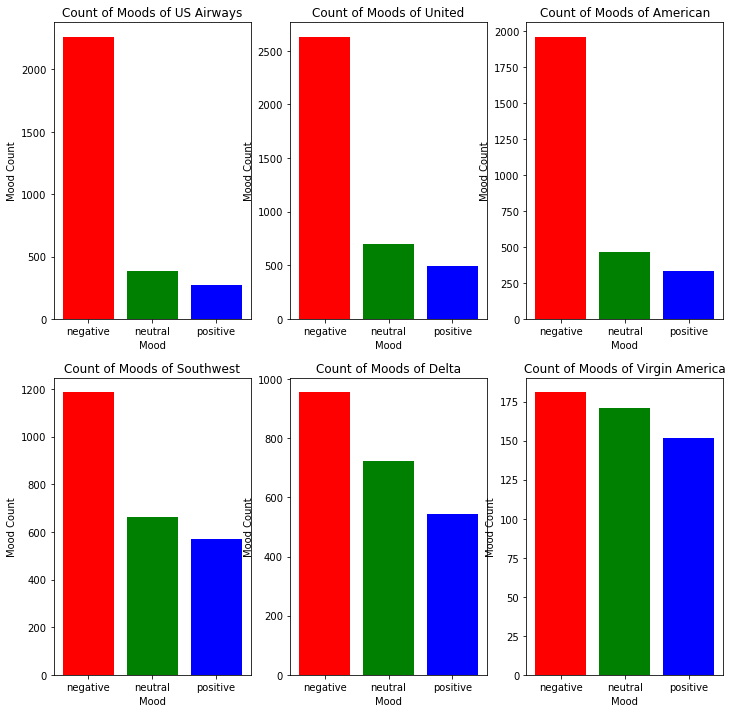

In [20]:
print("Total number of tweets for each airline \n ",tweets.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_tweets=tweets[tweets['airline']==i]
    count=new_tweets['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

 United, US Airways, American substantially get negative reactions. Tweets for Virgin America are the most balanced.

# Wordcloud for Negative sentiments of tweets:


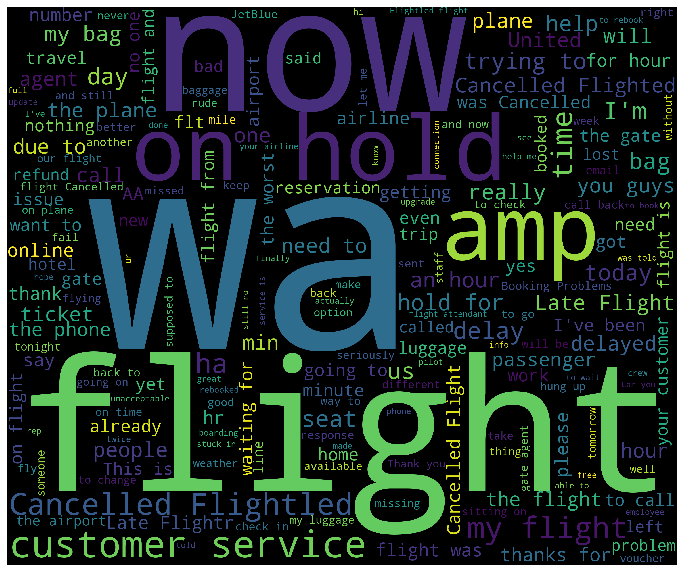

In [23]:
new_tweets=tweets[tweets['airline_sentiment']=='negative']
words = ' '.join(new_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The larger words in the wordcloud image has more frequency in our text data.

# Wordcloud for Positive sentiments of tweets:


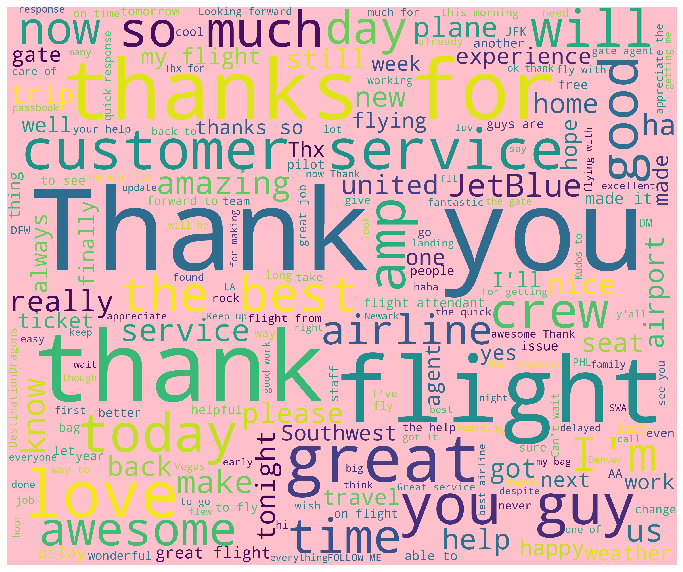

In [25]:
new_tweets=tweets[tweets['airline_sentiment']=='positive']
words = ' '.join(new_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='pink',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Read airline_sentiment , text columns 

In [27]:
df = tweets.copy()[['airline_sentiment', 'text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


# Define the number of classes and the number of tweets per class that you want to use. Let's do a binary classification where tweets are only labeled "positive" or "negative".

In [28]:
n_class = 2
n_tweet = 2363
# Divide into number of classes
if n_class == 2:
    df_pos = df.copy()[df.airline_sentiment == 'positive'][:n_tweet]
    df_neg = df.copy()[df.airline_sentiment == 'negative'][:n_tweet]
    df_neu = pd.DataFrame()
    df = pd.concat([df_pos, df_neg], ignore_index=True).reset_index(drop=True)
elif n_class == 3:
    df_pos = df.copy()[df.airline_sentiment == 'positive'][:n_tweet]
    df_neg = df.copy()[df.airline_sentiment == 'negative'][:n_tweet]
    df_neu = df.copy()[df.airline_sentiment == 'neutral'][:n_tweet]
    df = pd.concat([df_pos, df_neg, df_neu], ignore_index=True).reset_index(drop=True)

# process Tweet text

In [29]:
def ProTweets(tweet):
    tweet = ''.join(c for c in tweet if c not in string.punctuation)
    tweet = re.sub('((www\S+)|(http\S+))', 'urlsite', tweet)
    tweet = re.sub(r'\d+', 'contnum', tweet)
    tweet = re.sub(' +',' ', tweet)
    tweet = tweet.lower().strip()
    return tweet

def rmStopWords(tweet, stop_words):
    text = tweet.split()
    text = ' '.join(word for word in text if word not in stop_words)
    return text

# read a list of stop words and process each line of tweets in the dataframe

In [33]:
# Get list of stop words
stop_words = get_stop_words('english')
stop_words = [''.join(c for c in s if c not in string.punctuation) for s in stop_words]
stop_words = [t.encode('utf-8') for t in stop_words]
# Preprocess all tweet data
pro_tweets = []
for tweet in df['text']:
    processed = ProTweets(tweet)
    pro_stopw = rmStopWords(processed, stop_words)
    pro_tweets.append(pro_stopw)

df['text'] = pro_tweets

# Use train_test_split to divide the dataset up into training and test sets.

In [39]:
# Set up training and test sets by choosing random samples from classes
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.33, random_state=0)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train['text'] = X_train
df_train['airline_sentiment'] = y_train
df_train = df_train.reset_index(drop=True)

df_test['text'] = X_test 
df_test['airline_sentiment'] = y_test
df_test = df_test.reset_index(drop=True)

# define our own class called TweetNBClassifier.
# fit the classifier on our training data.
# predict the sentiment (positive or negative) of each tweet.
# computes naive Bayes classification probabilities with fit function.


In [35]:
class TweetNBClassifier(object):

    def __init__(self, df_train):
        self.df_train = df_train
        self.df_pos = df_train.copy()[df_train.airline_sentiment == 'positive']
        self.df_neg = df_train.copy()[df_train.airline_sentiment == 'negative']
        self.df_neu = df_train.copy()[df_train.airline_sentiment == 'neutral']

    def fit(self):
        Pr_pos = df_pos.shape[0]/self.df_train.shape[0]
        Pr_neg = df_neg.shape[0]/self.df_train.shape[0]
        Pr_neu = df_neu.shape[0]/self.df_train.shape[0]
        self.Prior  = (Pr_pos, Pr_neg, Pr_neu)

        self.pos_words = ' '.join(self.df_pos['text'].tolist()).split()
        self.neg_words = ' '.join(self.df_neg['text'].tolist()).split()
        self.neu_words = ' '.join(self.df_neu['text'].tolist()).split()

        all_words = ' '.join(self.df_train['text'].tolist()).split()

        self.vocab = len(Counter(all_words))

        wc_pos = len(' '.join(self.df_pos['text'].tolist()).split())
        wc_neg = len(' '.join(self.df_neg['text'].tolist()).split())
        wc_neu = len(' '.join(self.df_neu['text'].tolist()).split())
        self.word_count = (wc_pos, wc_neg, wc_neu)
        return self


    def predict(self, df_test):
        class_choice = ['positive', 'negative', 'neutral']

        classification = []
        for tweet in df_test['text']:
            text = tweet.split()

            val_pos = np.array([])
            val_neg = np.array([])
            val_neu = np.array([])
            for word in text:
                tmp_pos = np.log((self.pos_words.count(word)+1)/(self.word_count[0]+self.vocab))
                tmp_neg = np.log((self.neg_words.count(word)+1)/(self.word_count[1]+self.vocab))
                tmp_neu = np.log((self.neu_words.count(word)+1)/(self.word_count[2]+self.vocab))
                val_pos = np.append(val_pos, tmp_pos)
                val_neg = np.append(val_neg, tmp_neg)
                val_neu = np.append(val_neu, tmp_neu)

            val_pos = np.log(self.Prior[0]) + np.sum(val_pos)
            val_neg = np.log(self.Prior[1]) + np.sum(val_neg)
            val_neu = np.log(self.Prior[2]) + np.sum(val_neu)

            probability = (val_pos, val_neg, val_neu)
            classification.append(class_choice[np.argmax(probability)])
        return classification


    def score(self, feature, target):

        compare = []
        for i in range(0,len(feature)):
            if feature[i] == target[i]:
                tmp ='correct'
                compare.append(tmp)
            else:
                tmp ='incorrect'
                compare.append(tmp)
        r = Counter(compare)
        accuracy = r['correct']/(r['correct']+r['incorrect'])
        return accuracy

# The "predict" function uses these fit coefficients to predict the classes of our test data.
# the "score" function scores our results in terms of classification accuracy.

In [36]:
tnb = TweetNBClassifier(df_train)
tnb = tnb.fit()
predict = tnb.predict(df_test)
score = tnb.score(predict,df_test.airline_sentiment.tolist())
print(score)

c:\users\negar-pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log


0.926923076923077


The score value shows we correctly identify tweet sentiment 93% of the time.